Accuracy with 10 estimators: 0.8182
Confusion Matrix:
 [[6782  632]
 [1144 1211]]
n_estimators=10, Accuracy=0.8182
n_estimators=20, Accuracy=0.8244
n_estimators=30, Accuracy=0.8310
n_estimators=40, Accuracy=0.8314
n_estimators=50, Accuracy=0.8327
n_estimators=60, Accuracy=0.8328
n_estimators=70, Accuracy=0.8334
n_estimators=80, Accuracy=0.8335
n_estimators=90, Accuracy=0.8329
n_estimators=100, Accuracy=0.8328
n_estimators=110, Accuracy=0.8332
n_estimators=120, Accuracy=0.8330
n_estimators=130, Accuracy=0.8330
n_estimators=140, Accuracy=0.8328
n_estimators=150, Accuracy=0.8329
n_estimators=160, Accuracy=0.8332
n_estimators=170, Accuracy=0.8331
n_estimators=180, Accuracy=0.8331
n_estimators=190, Accuracy=0.8330
n_estimators=200, Accuracy=0.8332


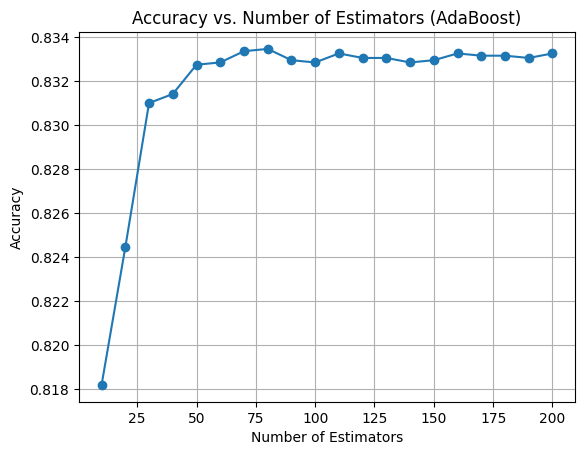

Best accuracy: 0.8335 achieved with 80 estimators.


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/income.csv")

# Define features and target
X = df.drop("income_level", axis=1)
y = df["income_level"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: AdaBoost with 10 estimators
model = AdaBoostClassifier(n_estimators=10, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
base_accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy with 10 estimators: {base_accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)

# Step 2: Fine-tuning n_estimators
estimator_range = range(10, 201, 10)
scores = []

for n in estimator_range:
    model = AdaBoostClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    scores.append(acc)
    print(f"n_estimators={n}, Accuracy={acc:.4f}")

# Plot accuracy vs. number of estimators
plt.plot(estimator_range, scores, marker='o')
plt.title("Accuracy vs. Number of Estimators (AdaBoost)")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# Best score and configuration
best_n = estimator_range[np.argmax(scores)]
best_score = max(scores)
print(f"Best accuracy: {best_score:.4f} achieved with {best_n} estimators.")
